In [1]:

import pandas as pd
from dbfread import DBF
import matplotlib.pyplot as plt

In [2]:
BASE_PATH = '/Users/eduardoaraujo/Documents/ArboFronteiras_data/ArboFronteiras/dados Foz/Foz do Iguaçu'
FILENAME_MOSQUITO = BASE_PATH +'/'+ "mosquitos positivos 2017 a 2022.xlsx"

# definição das colunas de interesse;
int_columns = [            
"id_armadilha",              
"area",              
"data_atividade",           
"habitantes",        
"total_dep_aed_aeg",         
"mosq_aed_aeg_m_morto",      
"mosq_aed_aeg_m_vivo",       
"mosq_aed_aeg_f_morto",      
"mosq_aed_aeg_f_vivo"       ]


data_mosquito = pd.read_excel(io=FILENAME_MOSQUITO, usecols = int_columns)


data_mosquito.set_index('data_atividade', inplace = True)

data_mosquito.index = pd.to_datetime(data_mosquito.index)

data_mosquito

,id_armadilha,area,habitantes,total_dep_aed_aeg,mosq_aed_aeg_m_morto,mosq_aed_aeg_m_vivo,mosq_aed_aeg_f_morto,mosq_aed_aeg_f_vivo
data_atividade,,,,,,,,
2018-01-05,11-04853,69,3.5,0,0,0,0,2
2018-01-05,2-04561,19,3.5,0,0,0,0,1
2018-01-05,9-02930,77,3.5,0,0,0,0,1
2018-01-08,5-03060,7,3.5,0,0,0,0,1
2018-03-07,7-05206,47,3.2,0,0,0,0,1
...,...,...,...,...,...,...,...,...
2018-01-03,4-00788,85,3.5,0,0,1,0,2
2018-01-03,4-03489,29,5.0,0,0,0,0,1
2018-01-04,5-09174,50,3.0,0,0,0,0,2


In [3]:
data_agg = data_mosquito.copy()

del data_agg['area']
del data_agg['habitantes']

data_agg_all = data_agg.resample('1M').sum()

data_agg_all['n_armadilhas'] = data_agg.resample('1M').count()['id_armadilha']

data_agg_all

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_1120/2101859539.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_agg_all = data_agg.resample('1M').sum()


,total_dep_aed_aeg,mosq_aed_aeg_m_morto,mosq_aed_aeg_m_vivo,mosq_aed_aeg_f_morto,mosq_aed_aeg_f_vivo,n_armadilhas
data_atividade,,,,,,
2017-03-31,1,0,3,1,11,9
2017-04-30,0,0,0,0,0,0
2017-05-31,0,0,0,0,0,0
2017-06-30,0,0,0,0,0,0
2017-07-31,0,0,0,0,8,7
...,...,...,...,...,...,...
2021-11-30,0,0,0,5,7,1
2021-12-31,0,0,0,0,0,0
2022-01-31,0,0,0,0,0,0


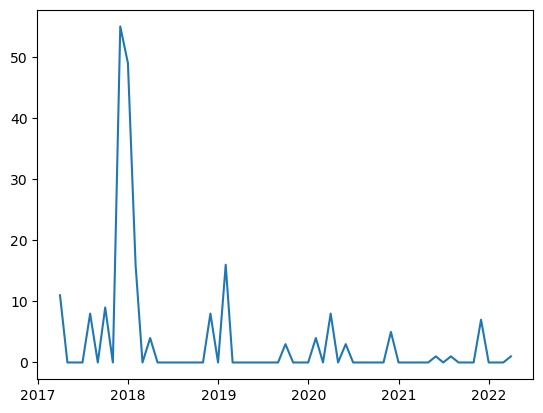

In [4]:
plt.plot(data_agg_all.mosq_aed_aeg_f_vivo)

In [5]:
data_mosquito.shape

(162, 8)

In [6]:
data_mosquito.isnull().sum()

id_armadilha            0
area                    0
habitantes              0
total_dep_aed_aeg       0
mosq_aed_aeg_m_morto    0
mosq_aed_aeg_m_vivo     0
mosq_aed_aeg_f_morto    0
mosq_aed_aeg_f_vivo     0
dtype: int64

In [7]:
filename = '/Users/eduardoaraujo/Documents/ArboFronteiras_data/ArboFronteiras/dados Foz/dados_mosquitos_Foz_com_dbf/armadilhas_liraa_XY.dbf'

data_dbf = DBF(filename)
data = pd.DataFrame(iter(data_dbf))

data.set_index('data_ativi', inplace = True )

data.index = pd.to_datetime(data.index)

data = data[['id_armadil', 'tt_dep_aa', 'habitantes', 
        'm_aaeg_m_m', 'm_aaeg_m_v', 'm_aaeg_f_m',
       'm_aaeg_f_v', ]      ]


data

,id_armadil,tt_dep_aa,habitantes,m_aaeg_m_m,m_aaeg_m_v,m_aaeg_f_m,m_aaeg_f_v
data_ativi,,,,,,,
2017-01-09,3-03080,0,3.5,0,0,0,0
2017-01-09,3-02960,0,3.5,0,0,0,0
2017-01-09,11-06704,0,3.5,0,0,0,0
2017-01-09,8-06421,0,4.0,0,0,0,1
2017-01-09,8-06665,0,5.0,0,0,0,0
...,...,...,...,...,...,...,...
2022-05-12,4-07762,0,6.0,0,0,0,0
2022-05-12,4-08181,0,3.0,0,0,0,0
2022-05-12,3-03472,1,3.0,0,0,0,0


In [8]:
data_pos = data.loc[(data.m_aaeg_m_m > 0) | 
                             (data.m_aaeg_m_v  > 0) |
                            (data.m_aaeg_f_m > 0) |
                            (data.m_aaeg_f_v > 0) ]

data_pos

,id_armadil,tt_dep_aa,habitantes,m_aaeg_m_m,m_aaeg_m_v,m_aaeg_f_m,m_aaeg_f_v
data_ativi,,,,,,,
2017-01-09,8-06421,0,4.0,0,0,0,1
2017-01-09,8-08157,0,3.5,0,0,1,0
2017-01-09,8-05890,1,3.5,0,0,0,1
2017-01-09,7-00559,0,3.5,0,0,1,0
2017-01-09,6-02863,0,3.5,0,0,1,0
...,...,...,...,...,...,...,...
2022-05-12,6-05998,0,2.0,0,0,1,0
2022-05-12,6-05885,0,8.0,0,0,3,0
2022-05-12,7-01313,0,8.0,0,0,2,0


In [9]:
data_pos_all = data_pos.copy()

data_pos_all = data_pos_all.resample('1M').sum()

data_pos_all['n_armadilhas'] = data_pos.resample('1M').count()['id_armadil']

data_pos_all['habitantes'] = data_pos.resample('1M').mean()['habitantes']

# considerando apenas os meses que houve coleta 

data_pos_all = data_pos_all.loc[data_pos_all.n_armadilhas > 0]

data_pos_all.head()

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_1120/3640478954.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_pos_all = data_pos_all.resample('1M').sum()
/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_1120/3640478954.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_pos_all['habitantes'] = data_pos.resample('1M').mean()['habitantes']


,tt_dep_aa,habitantes,m_aaeg_m_m,m_aaeg_m_v,m_aaeg_f_m,m_aaeg_f_v,n_armadilhas
data_ativi,,,,,,,
2017-01-31,11,3.525210,27,49,314,127,238
2017-03-31,24,3.455882,22,27,363,72,238
2017-05-31,8,3.348958,12,11,272,64,192
2017-07-31,1,3.519704,4,6,261,51,203
2017-09-30,0,3.285057,10,2,242,31,174


In [10]:
data_pos_all.head(20)

,tt_dep_aa,habitantes,m_aaeg_m_m,m_aaeg_m_v,m_aaeg_f_m,m_aaeg_f_v,n_armadilhas
data_ativi,,,,,,,
2017-01-31,11,3.525210,27,49,314,127,238
2017-03-31,24,3.455882,22,27,363,72,238
2017-05-31,8,3.348958,12,11,272,64,192
2017-07-31,1,3.519704,4,6,261,51,203
2017-09-30,0,3.285057,10,2,242,31,174
2017-11-30,17,3.509662,18,43,237,92,207
2017-12-31,0,3.501577,20,4,391,143,317
2018-01-31,9,3.496444,9,8,283,97,225
2018-02-28,1,3.583333,1,0,107,10,54


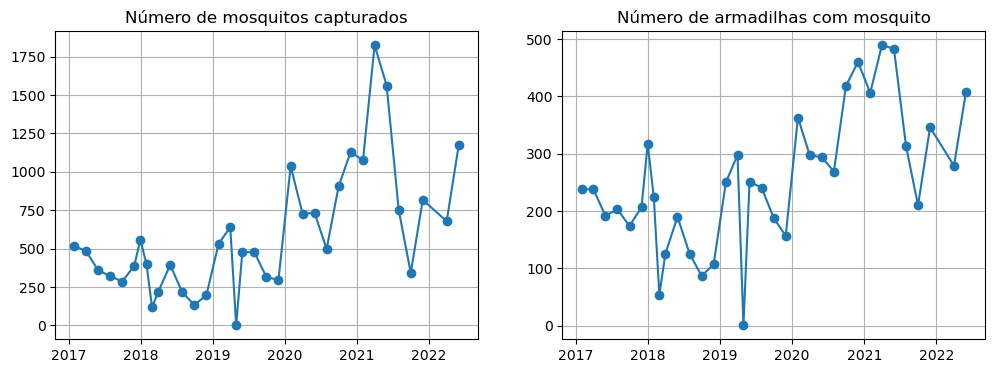

In [11]:
fig, ax = plt.subplots(1,2, figsize = (12,4))


ax[0].plot(data_pos_all.m_aaeg_m_m +
           data_pos_all.m_aaeg_m_v +
           data_pos_all.m_aaeg_f_m +
           data_pos_all.m_aaeg_f_v, marker = 'o')

ax[0].grid()

ax[0].set_title('Número de mosquitos capturados')

ax[1].plot(data_pos_all.n_armadilhas, marker = 'o')

ax[1].grid()

ax[1].set_title('Número de armadilhas com mosquito')
#ax.legend()

plt.show()

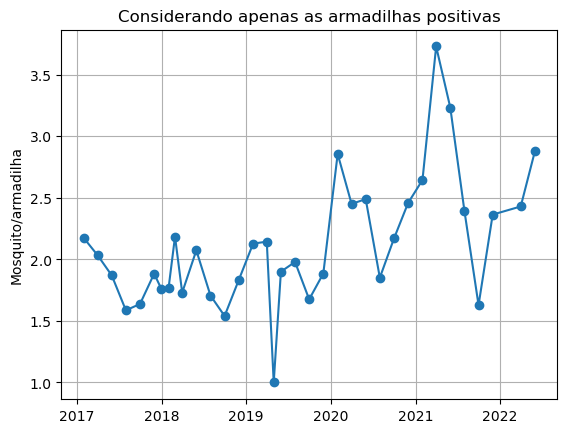

In [12]:
fig, ax = plt.subplots()

all_m_cap = data_pos_all.m_aaeg_m_m + data_pos_all.m_aaeg_m_v + data_pos_all.m_aaeg_f_m + data_pos_all.m_aaeg_f_v
            
            
ax.plot(all_m_cap/data_pos_all.n_armadilhas, marker = 'o')

ax.set_ylabel('Mosquito/armadilha')

ax.set_title('Considerando apenas as armadilhas positivas')

ax.grid()

plt.show()

In [13]:
(all_m_cap/data_pos_all.n_armadilhas).loc['2017-01-31': '2019-11-30'].mean()

1.8327989859061629

In [14]:
data_pos_all.habitantes.loc['2017-01-31': '2019-11-30'].mean()

3.378803796670265